<a href="https://colab.research.google.com/github/GuntherFrager/fuzzy-carnival/blob/main/Scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install python-binance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from binance.client import Client
# Get keys for usage with Binance API
API_KEY = '-'
API_SECRET = '-'

client = Client(API_KEY,API_SECRET)

BinanceAPIException: APIError(code=0): Service unavailable from a restricted location according to 'b. Eligibility' in https://www.binance.com/en/terms. Please contact customer service if you believe you received this message in error.

In [ ]:
# Picks the ADA BNB Trading Pair
TRADING_PAIR = 'BTCUSDT'
# Starting Date for Capturing Data
STARTING_DATE = "12 Nov, 2016"
# Ending Date for Capturing Data
END_DATE = "12 Nov, 2017"

In [ ]:
def process_message(msg):
    if msg['e'] == 'error':
        bm.stop_socket(conn_key)
        bm.close()
    else:
        pass

In [ ]:
# Importing Binance Websockets API
from binance.client import *
from binance import BinanceSocketManager
#from twisted.internet import reactor# Initialize Binance Socket Manager
#bm = BinanceSocketManager(client, user_timeout=60)
#list_messages = []
#conn_key = bm.start_trade_socket(TRADING_PAIR, process_message)
#bm.start()

## Get data

In [ ]:
candles = client.get_historical_klines(TRADING_PAIR, Client.KLINE_INTERVAL_3MINUTE, STARTING_DATE, END_DATE)


In [ ]:
import pandas as pd
indexes = ['Time', 'Open', 'High','Low', 'Close', 'Volume', 'Close Time', 'QAV', 'No. Trades', 'Taker BBAV', 'Taker BQAV', 'Ignore']
data = pd.DataFrame(columns=indexes,data=candles)
data.head()

,Time,Open,High,Low,Close,Volume,Close Time,QAV,No. Trades,Taker BBAV,Taker BQAV,Ignore
0,1502942400000,4261.48000000,4261.48000000,4261.48000000,4261.48000000,1.77518300,1502942459999,7564.90685084,3,0.07518300,320.39085084,0
1,1502942460000,4261.48000000,4261.48000000,4261.48000000,4261.48000000,0.00000000,1502942519999,0.00000000,0,0.00000000,0.00000000,0
2,1502942520000,4280.56000000,4280.56000000,4280.56000000,4280.56000000,0.26107400,1502942579999,1117.54292144,2,0.26107400,1117.54292144,0
3,1502942580000,4261.48000000,4261.48000000,4261.48000000,4261.48000000,0.01200800,1502942639999,51.17185184,3,0.01200800,51.17185184,0
4,1502942640000,4261.48000000,4261.48000000,4261.48000000,4261.48000000,0.14079600,1502942699999,599.99933808,1,0.14079600,599.99933808,0


In [ ]:
from datetime import datetime

data['Time'] = data['Time'].apply(lambda x: datetime.fromtimestamp(int(x)/1000))
data.set_index(['Time'], inplace=True)
data = data.filter(['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])


In [ ]:
for i in data.columns:
    data[i] = data[i].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124622 entries, 2017-08-17 01:00:00 to 2017-11-11 21:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Open    124622 non-null  float64
 1   High    124622 non-null  float64
 2   Low     124622 non-null  float64
 3   Close   124622 non-null  float64
dtypes: float64(4)
memory usage: 4.8 MB


In [ ]:
data.to_csv('usdt-btc.csv')

### Get data part 2

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/usdt-btc3.csv', index_col='Time')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3270436 entries, 2017-08-17 01:00:00 to 2023-11-11 04:01:00
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Open    float64
 1   High    float64
 2   Low     float64
 3   Close   float64
dtypes: float64(4)
memory usage: 124.8+ MB


In [ ]:
def eliminar_dias_faltantes(df):
    # Convierte la columna de índice a tipo datetime
    df.index = pd.to_datetime(df.index)

    # Agrupa por día y cuenta el número de registros por día
    registros_por_dia = df.groupby(df.index.date).size()

    # Filtra los días que tienen al menos un registro por minuto
    dias_con_registros_completos = registros_por_dia[registros_por_dia == 1440].index

    # Filtra el dataframe original para mantener solo los días completos


    return(dias_con_registros_completos)

# Ejemplo de uso
# Supongamos que 'df' es tu DataFrame
df_filtrado = eliminar_dias_faltantes(data)


In [ ]:
print(df_filtrado)

Index([2017-08-18, 2017-08-19, 2017-08-20, 2017-08-21, 2017-08-22, 2017-08-23,
       2017-08-24, 2017-08-25, 2017-08-26, 2017-08-27,
       ...
       2023-11-01, 2023-11-02, 2023-11-03, 2023-11-04, 2023-11-05, 2023-11-06,
       2023-11-07, 2023-11-08, 2023-11-09, 2023-11-10],
      dtype='object', length=2223)


In [ ]:
def filtrar_por_fechas(df, fechas_a_filtrar):
    # Convierte el índice a tipo datetime
    df.index = pd.to_datetime(df.index)

    # Filtra las fechas normalizadas que están en la lista
    fechas_coincidentes = df.index.normalize().isin(fechas_a_filtrar)

    # Aplica el filtro al DataFrame original
    df_filtrado2 = df[fechas_coincidentes]

    return df_filtrado2

# Ejemplo de uso
# Supongamos que 'df' es tu DataFrame y 'lista_fechas' es tu lista de fechas
lista_fechas = pd.to_datetime(df_filtrado).normalize()
df_final = filtrar_por_fechas(data, lista_fechas)


In [ ]:
df_final.head()

,Open,High,Low,Close
Time,,,,
2017-08-18 00:00:00,4244.77,4267.59,4244.77,4244.77
2017-08-18 00:01:00,4267.59,4278.05,4267.59,4278.05
2017-08-18 00:02:00,4244.77,4244.77,4244.77,4244.77
2017-08-18 00:03:00,4278.05,4278.05,4278.05,4278.05
2017-08-18 00:04:00,4278.05,4278.05,4278.05,4278.05


In [ ]:
for i in range(2190):
  try:
    print(df_final.index[(i*1440)])
  except:
    break


2017-08-18 00:00:00
2017-08-19 00:00:00
2017-08-20 00:00:00
2017-08-21 00:00:00
2017-08-22 00:00:00
2017-08-23 00:00:00
2017-08-24 00:00:00
2017-08-25 00:00:00
2017-08-26 00:00:00
2017-08-27 00:00:00
2017-08-28 00:00:00
2017-08-29 00:00:00
2017-08-30 00:00:00
2017-08-31 00:00:00
2017-09-01 00:00:00
2017-09-02 00:00:00
2017-09-03 00:00:00
2017-09-04 00:00:00
2017-09-05 00:00:00
2017-09-07 00:00:00
2017-09-08 00:00:00
2017-09-09 00:00:00
2017-09-10 00:00:00
2017-09-11 00:00:00
2017-09-12 00:00:00
2017-09-13 00:00:00
2017-09-14 00:00:00
2017-09-15 00:00:00
2017-09-16 00:00:00
2017-09-17 00:00:00
2017-09-18 00:00:00
2017-09-19 00:00:00
2017-09-20 00:00:00
2017-09-21 00:00:00
2017-09-22 00:00:00
2017-09-23 00:00:00
2017-09-24 00:00:00
2017-09-25 00:00:00
2017-09-26 00:00:00
2017-09-27 00:00:00
2017-09-28 00:00:00
2017-09-29 00:00:00
2017-09-30 00:00:00
2017-10-01 00:00:00
2017-10-02 00:00:00
2017-10-03 00:00:00
2017-10-04 00:00:00
2017-10-05 00:00:00
2017-10-06 00:00:00
2017-10-07 00:00:00


In [ ]:
df_final.to_csv('/content/drive/MyDrive/Colab Notebooks/usdt-btc4.csv')

In [ ]:
df = pd.read_csv('usdt-btc4.csv', index_col = 'Time')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3201120 entries, 2017-08-18 00:00:00 to 2023-11-10 23:59:00
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Open    float64
 1   High    float64
 2   Low     float64
 3   Close   float64
dtypes: float64(4)
memory usage: 122.1+ MB


## Data Exploration

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/usdt-btc2.csv', index_col= 'Time')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2749536 entries, 2017-08-17 01:00:00 to 2023-11-11 21:00:00
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Open    float64
 1   High    float64
 2   Low     float64
 3   Close   float64
 4   Volume  float64
dtypes: float64(5)
memory usage: 125.9+ MB


In [ ]:
print('Hay', len(df.index) - len(df.index.unique()), 'filas duplicadas')

Hay 4 filas duplicadas


In [ ]:
a = df.index.value_counts()

In [ ]:
a.info()

<class 'pandas.core.series.Series'>
Index: 2749532 entries, 2022-11-11 21:00:00 to 2023-11-11 21:00:00
Series name: Time
Non-Null Count    Dtype
--------------    -----
2749532 non-null  int64
dtypes: int64(1)
memory usage: 42.0+ MB


In [ ]:
auxlist = []
for i in range(len(a)):
    if a[i] != 1:
        auxlist.append(a.index[i])

auxlist

['2022-11-11 21:00:00',
 '2021-11-11 21:00:00',
 '2020-11-11 21:00:00',
 '2019-11-11 21:00:00']

In [ ]:
df = df.drop_duplicates()

In [ ]:
print('Hay', len(df.index) - len(df.index.unique()), 'filas duplicadas')

Hay 0 filas duplicadas


In [ ]:
b = 0
a = 0
l = []

for i in range(len(df.Open)):
  if i == a:
    l.append(df.Open[i])
    a = a + 1440
  else:
      pass

len(l)

1899

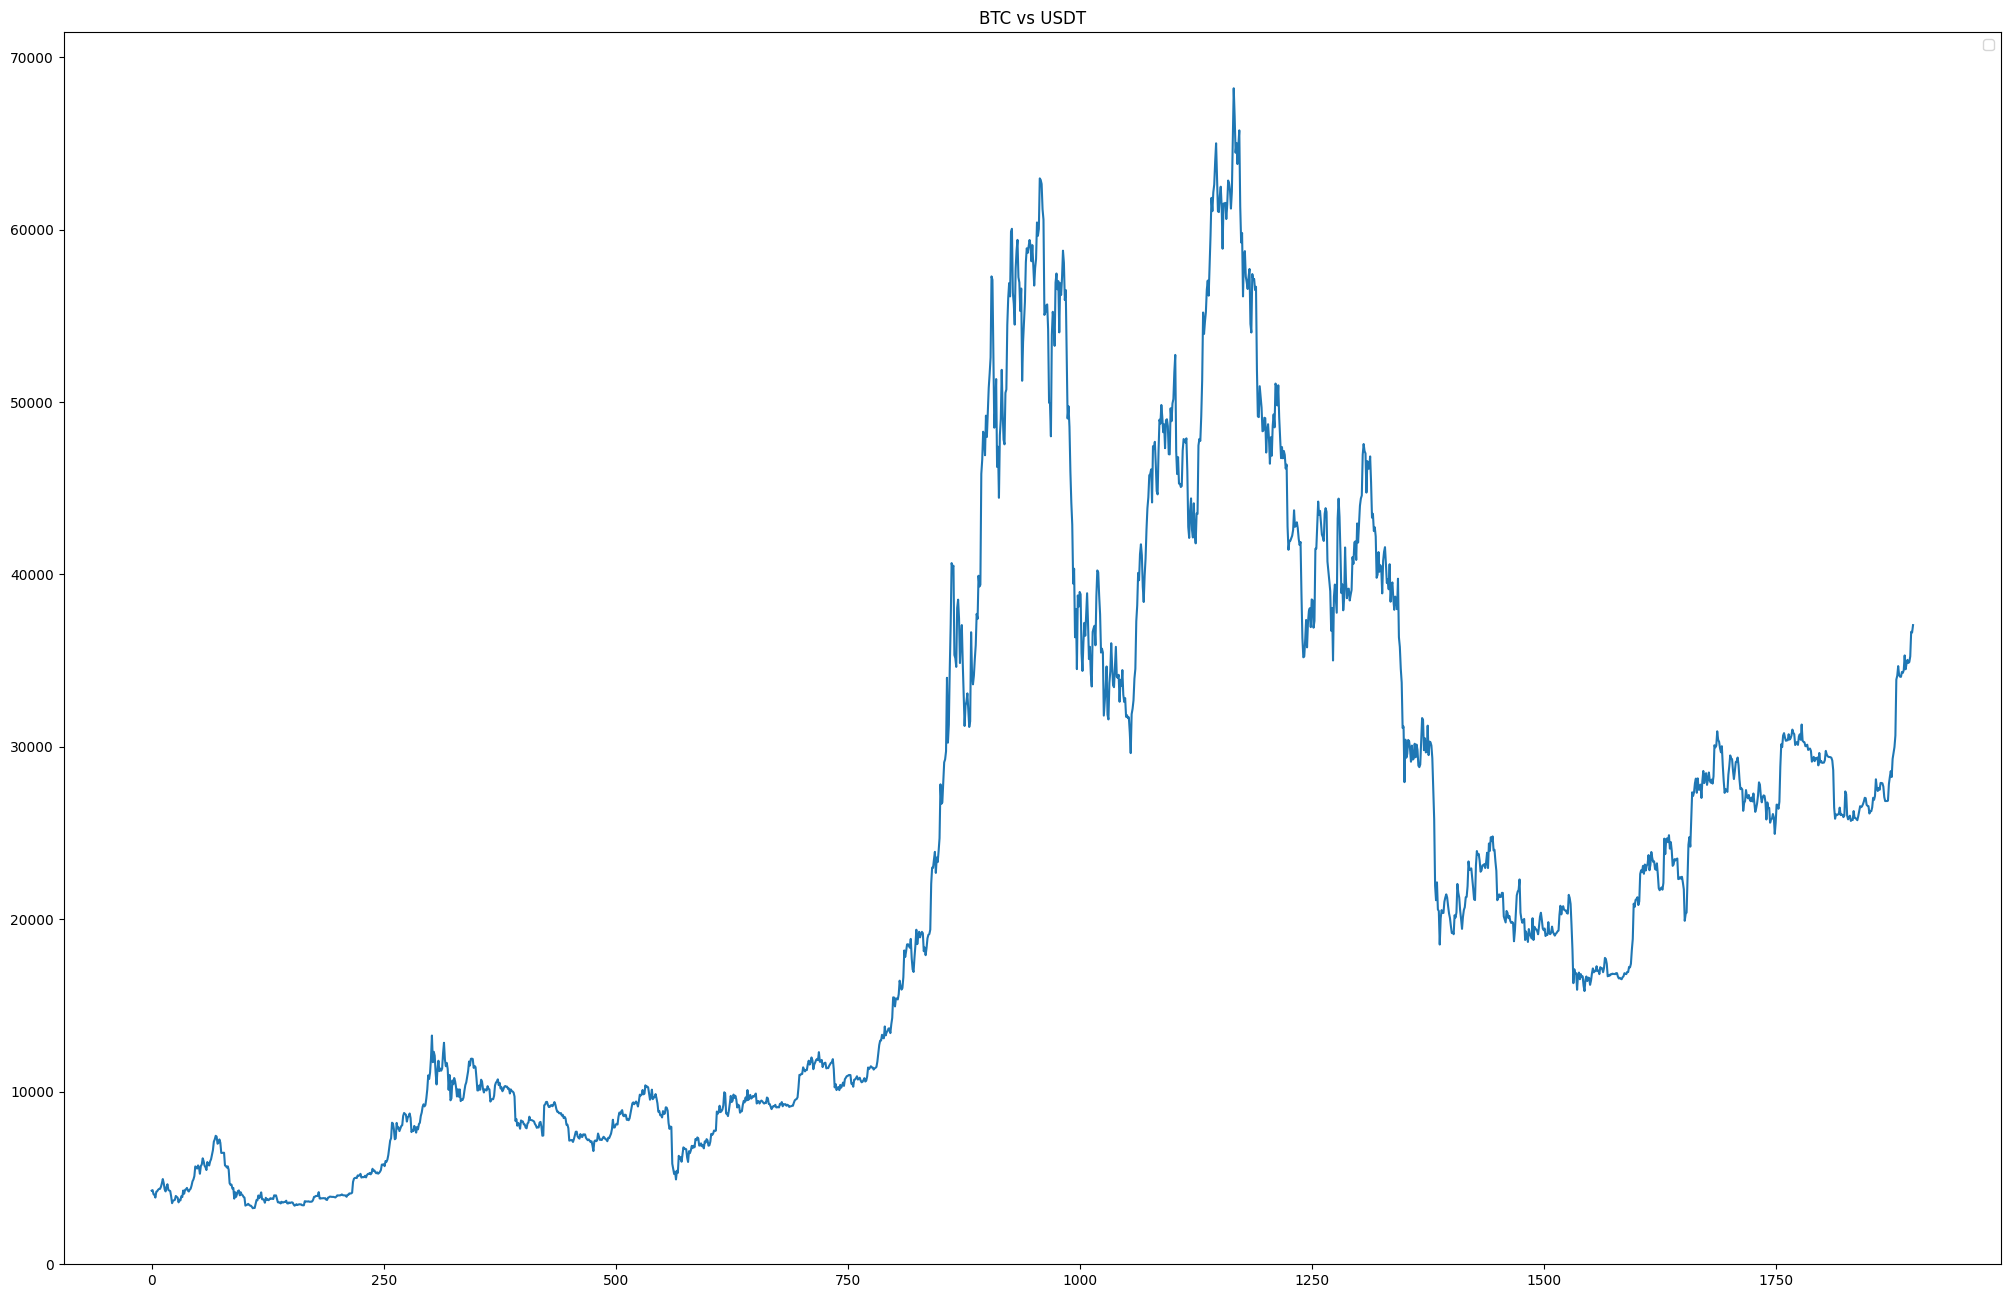

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,16))
plt.plot(l)
plt.title('BTC vs USDT')
plt.legend()
plt.show()

### Dividiendo el dataframe para la exploracion

In [ ]:
import pandas as pd
df_final = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/usdt-btc4.csv', index_col = 'Time')

df_final.head()

,Open,High,Low,Close
Time,,,,
2017-08-18 00:00:00,4244.77,4267.59,4244.77,4244.77
2017-08-18 00:01:00,4267.59,4278.05,4267.59,4278.05
2017-08-18 00:02:00,4244.77,4244.77,4244.77,4244.77
2017-08-18 00:03:00,4278.05,4278.05,4278.05,4278.05
2017-08-18 00:04:00,4278.05,4278.05,4278.05,4278.05


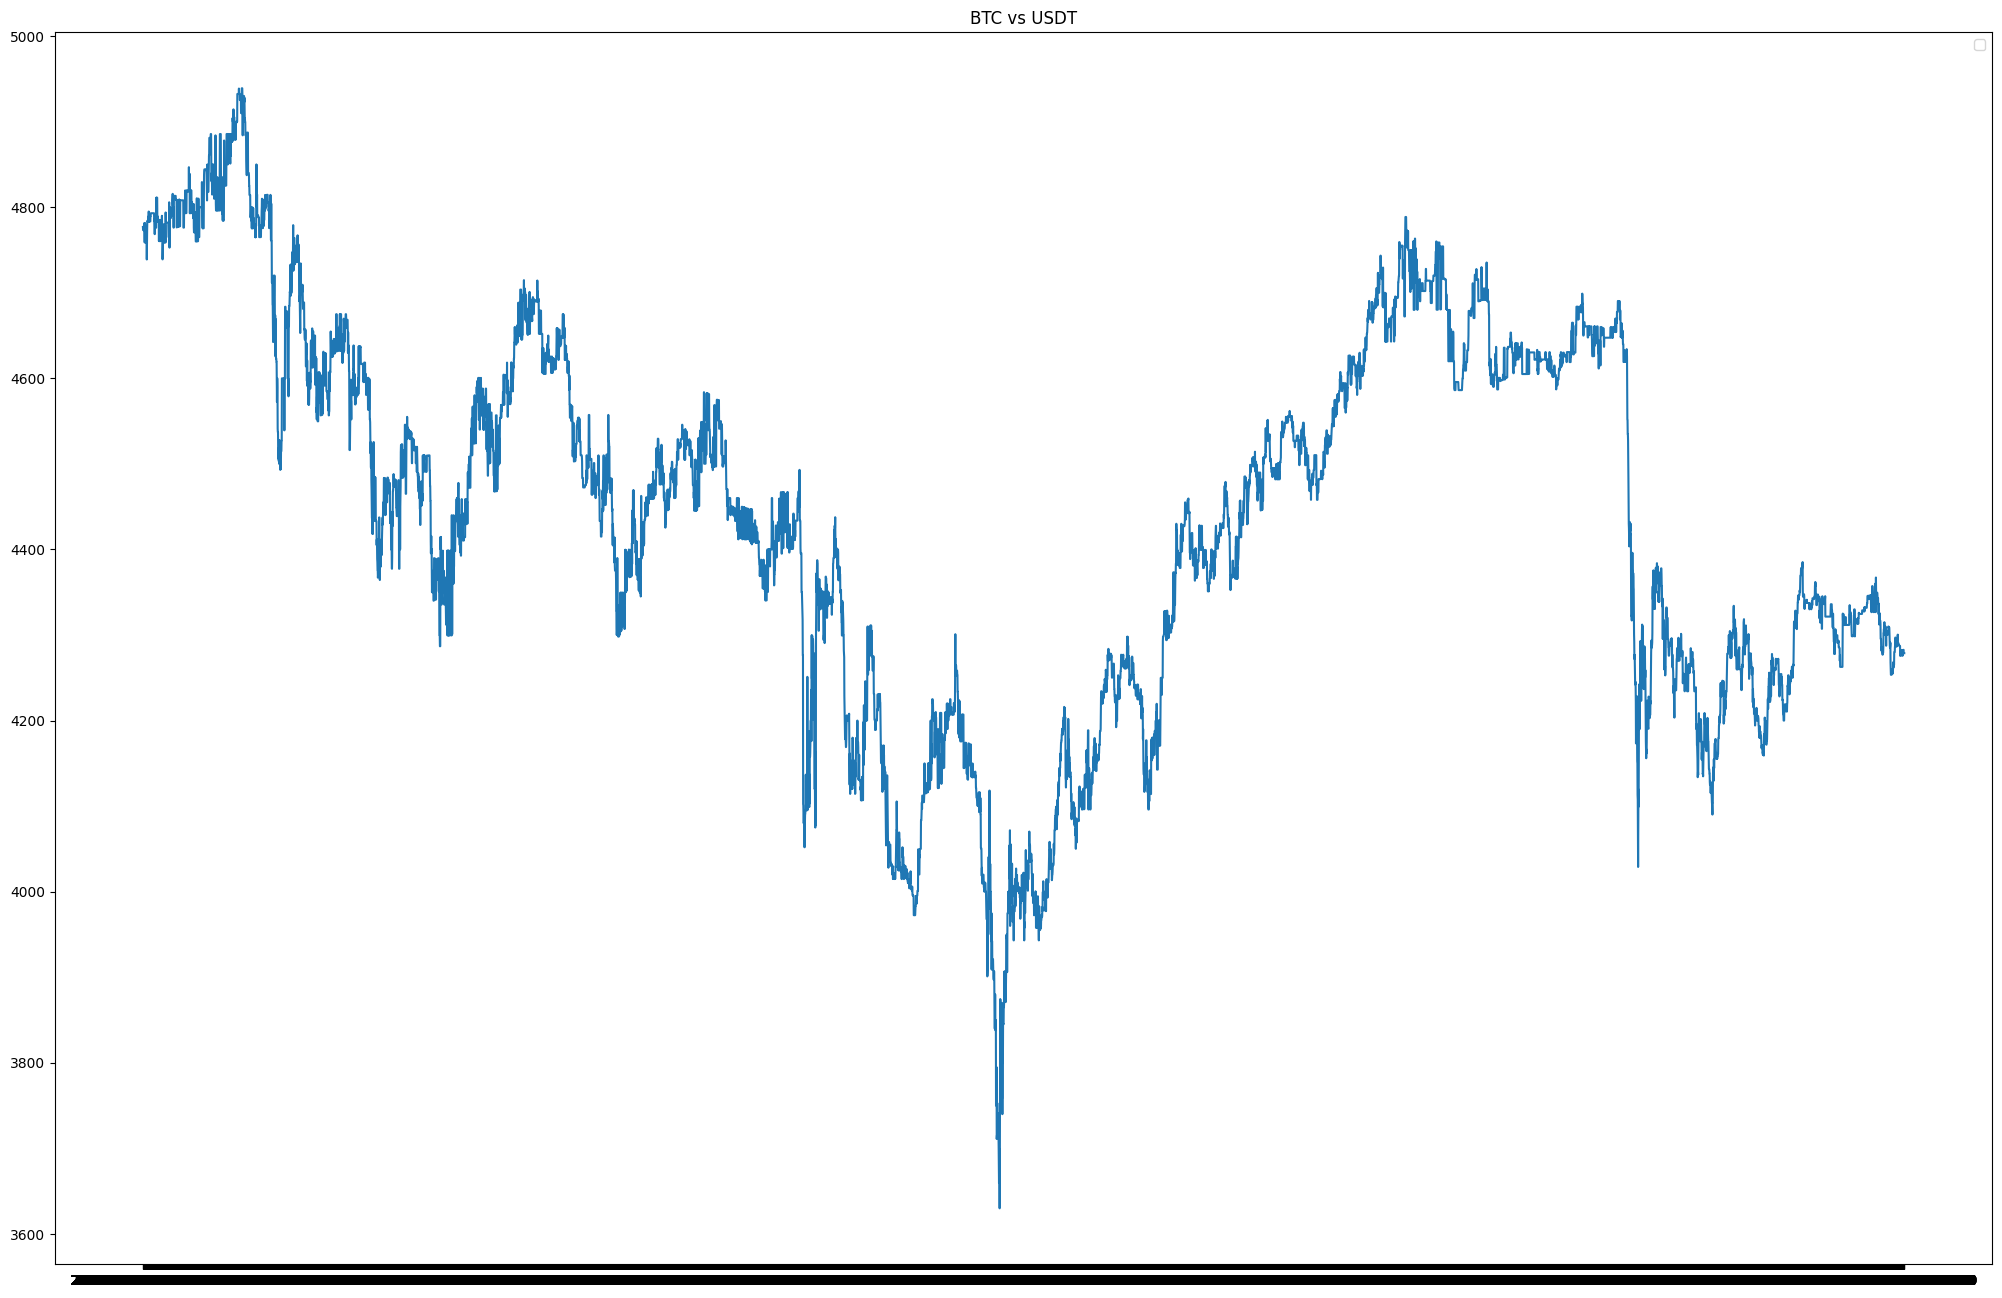

In [ ]:
import matplotlib.pyplot as plt

l = df_final.Open[21000:31000]

plt.figure(figsize=(25,16))
plt.plot(l)
plt.title('BTC vs USDT')
plt.legend()
plt.show()

## Intento de normalizacion

In [ ]:
import pandas as pd

In [ ]:
df_final = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/usdt-btc4.csv', index_col = 'Time')

In [ ]:
df_final.Open[:1440].head()

Time
2017-08-18 00:00:00    4244.77
2017-08-18 00:01:00    4267.59
2017-08-18 00:02:00    4244.77
2017-08-18 00:03:00    4278.05
2017-08-18 00:04:00    4278.05
Name: Open, dtype: float64

In [ ]:
i = i + 1440

NameError: ignored

In [ ]:
df_final_dia1 = df_final[:][:i+1440]
df_final_dia2 = df_final[:][i+1440:i+2880]


df_final_dia2['Open'] = df_final_dia2['Open']/(df_final_dia1['Open'].max()*2)
df_final_dia2['High'] = df_final_dia2['High']/(df_final_dia1['High'].max()*2)
df_final_dia2['Low'] = df_final_dia2['Low']/(df_final_dia1['Low'].max()*2)
df_final_dia2['Close'] = df_final_dia2['Close']/(df_final_dia1['Close'].max()*2)

df_final_dia2.describe()

,Open,High,Low,Close
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.445809,0.446308,0.445308,0.445777
std,0.015095,0.015024,0.015159,0.015106
min,0.388890,0.388881,0.388891,0.388881
25%,0.439040,0.440236,0.438697,0.439195
50%,0.445338,0.446563,0.445209,0.445549
75%,0.457404,0.457638,0.456715,0.457391
max,0.472157,0.472146,0.472159,0.472146
